In [1]:
# We are going to use some julia code as well as python code in here so we need to import the necessary libraries

# python libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
%matplotlib inline

In [2]:
# julia libraries
import julia
# julia.install() # call this only once to install the julia package
from julia.api import Julia
jl = Julia(compiled_modules=False)  # Initialize the Julia runtime

# Now you can call Julia code
from julia import Main

In [3]:
# Call the julia script
Main.include("julia_script.jl")

<PyCall.jlwrap bed>

In [12]:
# Parameters definition ----------------------------------------------
def params_define():
    # Prescribed initial values of model parameters in a dictionary
    params = {}
    params["A"]         = 4e-26         
    params["year"]      = 3600 * 24 * 365
    params["n"]         = 3
    params["C"]         = 3e6
    params["rho_i"]     = 900
    params["rho_w"]     = 1000
    params["g"]         = 9.8
    params["B"]         = params["A"] ** (-1 / params["n"])
    params["m"]         = 1 / params["n"]
    params["accum"]     = 0.65 / params["year"]
    params["facemelt"]  = 5 / params["year"]

    # Scaling parameters
    params["hscale"]    = 1000
    params["ascale"]    = 1.0 / params["year"]
    params["uscale"]    = (params["rho_i"] * params["g"] * params["hscale"] * params["ascale"] / params["C"]) ** (1 / (params["m"] + 1))
    params["xscale"]    = params["uscale"] * params["hscale"] / params["ascale"]
    params["tscale"]    = params["xscale"] / params["uscale"]
    params["eps"]       = params["B"] * ((params["uscale"] / params["xscale"]) ** (1 / params["n"])) / (2 * params["rho_i"] * params["g"] * params["hscale"])
    params["lambda"]    = 1 - (params["rho_i"] / params["rho_w"])

    # Grid parameters
    params["NT"]        = 1
    params["TF"]        = params["year"]
    params["dt"]        = params["TF"] / params["NT"]
    params["transient"] = 0
    params["tcurrent"]  = 1

    params["N1"]        = 40
    params["N2"]        = 10
    params["sigGZ"]     = 0.97
    params["NX"]        = params["N1"] + params["N2"]

    # Bed params
    # params["b0"] = -400
    params["xsill"]      = 50e3
    params["sillamp"]    = 500
    params["sillsmooth"] = 1e-5
    # params["bxr"] = 1e-3
    # params["bxp"] = -1e-3

    # EnKF params
    params["inflation"] = 1.0
    params["assim"]     = False

    # Generating sigma values
    sigma1    = np.linspace(params["sigGZ"] / (params["N1"] + 0.5), params["sigGZ"], int(params["N1"]))
    sigma2    = np.linspace(params["sigGZ"], 1, int(params["N2"] + 1))
    sigma     = np.concatenate((sigma1, sigma2[1:params["N2"] + 1]))

    # Create the grid dictionary
    grid                = {"sigma": sigma}
    grid["sigma_elem"]  = np.concatenate(([0], (sigma[:-1] + sigma[1:]) / 2))
    grid["dsigma"]      = np.diff(grid["sigma"])

    return params, grid

# bed topography function --------------------------------------------------------------
def bed(x,params):
    b = params['sillamp'] * (-2 * np.arccos((1 - params['sillsmooth']) * np.sin(np.pi * x / (2 * params['xsill'])))/np.pi - 1)
    return b

# Observation operator ----------------------
def Obs(huxg_virtual_obs, m_obs):
    # Determine the size of the observation vector
    n = huxg_virtual_obs.shape[0]
    m = m_obs

    # Initialize the H matrix with zeros
    H = np.zeros((m * 2 + 1, n))

    # Calculate the distance between measurements
    di = int((n - 2) / (2 * m))  # Python uses int for integer division

    # Fill in the H matrix
    for i in range(1, m + 1):  # Python's range is 0-based, so start from 1
        H[i - 1, i * di] = 1  # Adjust for 0-based indexing
        H[m + i - 1, int((n - 2) / 2) + i * di] = 1  # Adjust for 0-based indexing

    # Final element of H matrix
    H[m * 2, n - 1] = 1  # Adjust for 0-based indexing

    # Perform matrix multiplication
    z = H @ huxg_virtual_obs  # '@' operator for matrix multiplication in Python
    return z

# Jacobian of the observation operator
def JObs(n_model, m_obs):
    # Initialize the H matrix with zeros
    n = n_model
    m = m_obs
    H = np.zeros((m * 2 + 1, n))

    # Calculate the distance between measurements
    di = int((n - 2) / (2 * m))  # Convert distance to an integer

    # Fill in the H matrix
    for i in range(1, m + 1):  # Python uses 0-based indexing
        H[i - 1, i * di] = 1  # Adjust for 0-based indexing
        H[m + i - 1, int((n - 2) / 2) + i * di] = 1  # Adjust for 0-based indexing

    # Final element of H matrix
    H[m * 2, n - 1] = 1  # Adjust for 0-based indexing

    return H


In [5]:
# check if Julia function is available
print(hasattr(Main, "Jac_calc")) # True if the function is available
print(hasattr(Main, "flowline!"))
print(hasattr(Main, "flowline_run"))

True
True
True


Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19
Step 20
Step 21
Step 22
Step 23
Step 24
Step 25
Step 26
Step 27
Step 28
Step 29
Step 30
Step 31
Step 32
Step 33
Step 34
Step 35
Step 36
Step 37
Step 38
Step 39
Step 40
Step 41
Step 42
Step 43
Step 44
Step 45
Step 46
Step 47
Step 48
Step 49
Step 50
Step 51
Step 52
Step 53
Step 54
Step 55
Step 56
Step 57
Step 58
Step 59
Step 60
Step 61
Step 62
Step 63
Step 64
Step 65
Step 66
Step 67
Step 68
Step 69
Step 70
Step 71
Step 72
Step 73
Step 74
Step 75
Step 76
Step 77
Step 78
Step 79
Step 80
Step 81
Step 82
Step 83
Step 84
Step 85
Step 86
Step 87
Step 88
Step 89
Step 90
Step 91
Step 92
Step 93
Step 94
Step 95
Step 96
Step 97
Step 98
Step 99
Step 100
Step 101
Step 102
Step 103
Step 104
Step 105
Step 106
Step 107
Step 108
Step 109
Step 110
Step 111
Step 112
Step 113
Step 114
Step 115
Step 116
Step 117
Step 118
Step 119
Step 120
Step 121
Step 122
Step 123
S

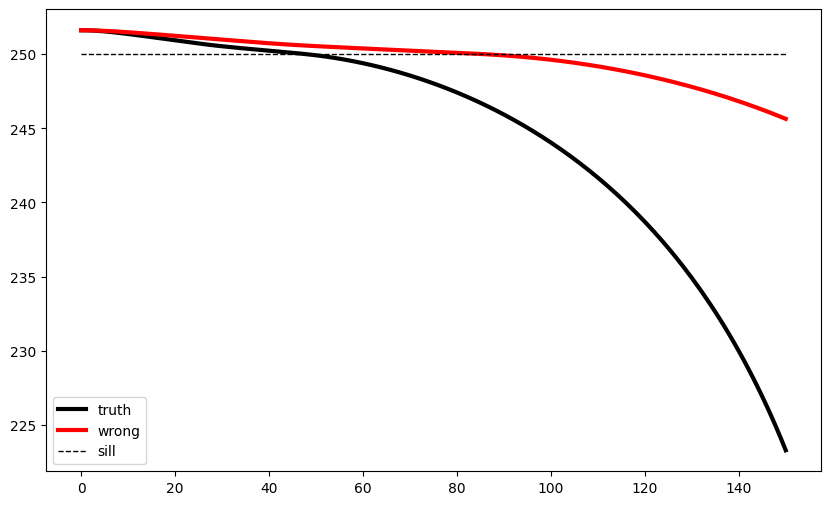

In [6]:
# Initial guess and steady state
params, grid = params_define()
xg = 300e3 / params["xscale"]
hf = (-Main.bed(xg * params["xscale"], params) / params["hscale"]) / (1 - params["lambda"])
h  = 1 - (1 - hf) * grid["sigma"]
u  = 1.0 * (grid["sigma_elem"] ** (1 / 3)) + 1e-3
huxg_old = np.concatenate((h, u, [xg]))

# writing Julia code in python -------------------------
Main.huxg_old = huxg_old
Main.params = params
Main.grid = grid
Main.eval('''
    Jf! = Jac_calc(huxg_old, params, grid, bed, flowline!)
    solve_result=nlsolve((F,varin) ->flowline!(F, varin, huxg_old, params, grid, bed), Jf!, huxg_old,iterations=1000)
    huxg_out0 = solve_result.zero

    # true simulation -------------------------------------------------
    params["NT"] = 150
    params["TF"] = params["year"]*150
    params["dt"] = params["TF"] / params["NT"]
    params["transient"] = 1
    params["facemelt"] = [LinRange(5,85,params["NT"]+1);]  / params["year"]
    fm_dist = Normal(0,20.0)
    #params["facemelt"] = params["facemelt"] + (rand(fm_dist, size(params["facemelt"])) / params["year"])
    fm_truth = params["facemelt"] #+ (rand(RedGaussian(size(params["facemelt"],1),20.0)) / params["year"])
    params["facemelt"] = fm_truth
    huxg_out1 = flowline_run(huxg_out0, params, grid, bed, flowline!)

    # wrong simulation ------------------------------------------------
    fm_wrong =[LinRange(5,45,params["NT"]+1);]  / params["year"]
    params["facemelt"] = [LinRange(5,45,params["NT"]+1);]  / params["year"]
    huxg_out2 = flowline_run(huxg_out0, params, grid, bed, flowline!)

    ts = LinRange(0,params["TF"]/params["year"],params["NT"]+1)
    xg_truth = vcat(huxg_out0[2*params["NX"]+1],huxg_out1[2*params["NX"]+1,:]).*params["xscale"];
    xg_wrong = vcat(huxg_out0[2*params["NX"]+1],huxg_out2[2*params["NX"]+1,:]).*params["xscale"];
''')
huxg_out0 = Main.huxg_out0
huxg_out1 = Main.huxg_out1
huxg_out2 = Main.huxg_out2
params    = Main.params

ts = Main.ts
xg_truth = Main.xg_truth
xg_wrong = Main.xg_wrong

# plottings
plt.figure(figsize=(10,6))
plt.plot(ts, xg_truth/1e3, lw=3, color='black', label='truth')
plt.plot(ts, xg_wrong/1e3, lw=3, color='red', label='wrong')
plt.plot(ts, 250.0*np.ones_like(ts), lw=1, color='black', linestyle='--', label='sill')
plt.legend()

In [7]:
# Set ensemble parameters
statevec_init = np.concatenate((huxg_out0, [params["facemelt"][0] / params["uscale"]]))

# Dimension of model state
nd = statevec_init.shape[0]

# Number of ensemble members
N = 30

# Define the standard deviations for model, observation, and process noise
sig_model = 1e-1
sig_obs = 1e-2
sig_Q = 1e-2

# Initialize the Cov_model matrix
Cov_model = (sig_model**2) * np.eye(nd)

# Initialize the Q matrix
Q = (sig_Q**2) * np.eye(nd)

# Set model parameters for single time step runs
nt = params["NT"]
tfinal_sim = params["TF"]

# Create the time vector 'ts' as in Julia's [(0.0:1.0:params["NT"]);] .* params["year"]
ts = np.arange(0.0, params["NT"] + 1) * params["year"]

# Update parameters for a single time step run
params["NT"] = 1
params["TF"] = params["year"] * 1
params["dt"] = params["TF"] / params["NT"]
params["transient"] = 1
params["assim"] = True  # Python uses capitalized 'True'

# Concatenate elements similar to Julia's vcat
statevec_sig = np.concatenate((grid["sigma_elem"], grid["sigma"], np.array([1, 1])))

taper = np.ones((statevec_sig.shape[0], statevec_sig.shape[0]))
taper[-1, -3] = 2  
taper[-3, -1] = 2  
taper[-1, -1] = 10  
taper[-2, -1] = 10  
taper[-1, -2] = 10  

# Generate synthetic observations of thickness from the "truth" simulation

# Create the observation time vector as in Julia's [(10.0:10.0:140.0);] .* params["year"]
ts_obs = np.arange(10.0, 140.0 + 1, 10.0) * params["year"]

# Find the indices of ts that match ts_obs (equivalent to findall(in(ts_obs), ts))
idx_obs = np.nonzero(np.isin(ts, ts_obs))[0]

# Define the observation noise distribution (equivalent to Normal(0, sig_obs) in Julia)
obs_dist = norm(loc=0, scale=sig_obs)

# Create virtual observations by vertically concatenating huxg_out1 and fm_truth with added noise
fm_truth_scaled = Main.fm_truth[idx_obs] / params["uscale"]
huxg_virtual_obs = np.vstack((huxg_out1[:, idx_obs], fm_truth_scaled.T))

# Add random noise to the virtual observations
huxg_virtual_obs += obs_dist.rvs(size=huxg_virtual_obs.shape)

# Optional: add extra noise to the last row if needed
# huxg_virtual_obs[-1, :] = huxg_out1[-1, idx_obs] + 2 * obs_dist.rvs(size=huxg_out1[-1, idx_obs].shape)

# Set the number of observations
params["m_obs"] = 10

In [8]:
# Initialize ensemble
statevec_bg = np.zeros((nd, nt + 1))        # Background state vector (ub)
statevec_ens_mean = np.zeros((nd, nt + 1))  # Ensemble mean state vector (ua)
mm_ens_mean = np.zeros((nd - 1, nt + 1))    # Ensemble mean minus one dimension (ua)
statevec_ens = np.zeros((nd, N))            # Individual ensemble members (uai)
statevec_ens_full = np.zeros((nd, N, nt + 1)) # Full ensemble for all timesteps (uae)

# Set initial conditions
statevec_bg[:, 0] = statevec_init
statevec_ens_mean[:, 0] = statevec_init

# Initialize the ensemble with perturbations
for i in range(N):
    # Sample from a multivariate normal distribution
    perturbed_state = multivariate_normal.rvs(mean=np.zeros(nd-1), cov=Cov_model[:nd-1, :nd-1])
    
    # Assign the perturbed state to the ensemble, excluding the last element
    statevec_ens[:-1, i] = statevec_init[:-1] + perturbed_state
    
    # Keep the last element unchanged
    statevec_ens[-1, i] = statevec_init[-1]

# Store the ensemble initialization for the first timestep
statevec_ens_full[:, :, 0] = statevec_ens
# print(statevec_ens_full[:,:,0].shape)
# statevec_ens_full[:,:,0]

In [9]:
# EnKF function ------------------------------
def EnKF(huxg_ens,huxg_obs,ObsFun,JObsFun,Cov_obs,Cov_model,params,grid):
    n = huxg_ens.shape[0]  # State size
    N = huxg_ens.shape[1]  # Ensemble size
    m = huxg_obs.shape[0]  # Measurement size

    huxg_ens_mean = np.mean(huxg_ens, axis=1)   # Mean of model forecast ensemble
    Jobs = JObsFun(n, params["m_obs"])          # Jacobian of observation operator

    KalGain = Cov_model @ Jobs.T @ np.linalg.inv(Jobs @ Cov_model @ Jobs.T + Cov_obs)  # Compute Kalman gain

    obs_virtual = np.zeros((m, N))
    analysis_ens = np.zeros((n, N))
    # mismatch_ens = np.zeros((n-1, N))
    for i in range(N):
        obs_virtual[:, i] = huxg_obs + np.random.multivariate_normal(np.zeros(m), Cov_obs)  # Generate virtual observations
        analysis_ens[:, i] = huxg_ens[:, i] + KalGain @ (obs_virtual[:, i] - ObsFun(huxg_ens[:, i], params["m_obs"]))  # Generate analysis ensemble
        # mismatch_ens[:, i] = obs_virtual[:, i] - ObsFun(huxg_ens[:, i], params["m_obs"])  # Calculate mismatch

    analysis_ens_mean = np.mean(analysis_ens, axis=1)  # Mean of analysis ensemble

    analysis_cov = (1 / (N - 1)) * (analysis_ens - np.repeat(analysis_ens_mean, N, axis=1)) @ (analysis_ens - np.repeat(analysis_ens_mean, N, axis=1)).T  # Analysis error covariance

    analysis_cov = analysis_cov * taper
    return analysis_ens, analysis_cov

In [ ]:
Main.nt = nt
Main.nd = nd
Main.N = N
for k in range(1, nt + 1):
    params["tcurrent"] = k
    print(f"Step {k}\n")
    
    # Pass Python variables to Julia
    Main.k = k
    Main.params = params
    Main.grid = grid
    Main.Q = Q
    Main.statevec_bg = statevec_bg
    Main.statevec_ens = statevec_ens

    # Julia code execution in the loop
    Main.eval('''
        params["tcurrent"] = k
        # println("Step $k\\n")
        
        # Forecast step
        statevec_bg[1:end-1,k+1] = flowline_run(statevec_bg[1:end-1,k], params, grid, bed, flowline!)[:, 1]
        statevec_bg[end,k+1] = params["facemelt"][k+1] / params["uscale"]

        for i in 1:N  # Forecast ensemble
            huxg_temp = flowline_run(statevec_ens[1:end-1,i], params, grid, bed, flowline!)[:, 1]
            global nos = rand(MvNormal(zeros(nd), Q))
            global statevec_ens[:,i] = vcat(huxg_temp, params["facemelt"][k+1] / params["uscale"]) + nos
        end
    ''')
    
    # Retrieve updated variables from Julia back into Python
    statevec_bg = Main.statevec_bg
    statevec_ens = Main.statevec_ens

    # analysis step
    statevec_ens_mean[:, k] = np.mean(statevec_ens, axis=1)  # Store the ensemble mean

    if np.any(ts[k] == ts_obs):  
        # Find the indices where ts[k+1] matches ts_obs
        idx_obs = np.where(ts[k] == ts_obs)[0]  # Find index in ts_obs

        # Forecast error covariance matrix calculation
        ens_mean_repeated = np.tile(statevec_ens_mean[:, k], (N, 1)).T  # Repeat the mean for each ensemble member
        Cov_model = (1 / (N - 1)) * (statevec_ens - ens_mean_repeated) @ (statevec_ens - ens_mean_repeated).T

        # Apply tapering to the covariance matrix
        Cov_model *= taper

        # Measurement noise covariance matrix
        Cov_obs = (sig_obs**2) * np.eye(2 * params["m_obs"] + 1)  # Use np.eye for identity matrix

        # Subsample virtual observations to actual measurement locations
        huxg_obs = Obs(huxg_virtual_obs[:, idx_obs], params["m_obs"])  # Python equivalent of Obs

        # Perform Ensemble Kalman Filter (EnKF) analysis corrections
        statevec_ens_temp, Cov_model = EnKF(statevec_ens, huxg_obs, Obs, JObs, Cov_obs, Cov_model, params, grid)

        # Update the ensemble and ensemble mean after correction
        statevec_ens = statevec_ens_temp
        statevec_ens_mean[:, k] = np.mean(statevec_ens, axis=1)  # Compute mean again after correction

        # Apply inflation to the ensemble
        ens_mean_repeated = np.tile(statevec_ens_mean[:, k], (N, 1)).T
        statevec_ens = ens_mean_repeated + params["inflation"] * (statevec_ens - ens_mean_repeated)

        # Update facemelt parameter for future time steps
        params["facemelt"][k:] = statevec_ens_mean[-1, k+1] * params["uscale"] * np.ones_like(params["facemelt"][k:])

    # Store the full ensemble for the timestep
    statevec_ens_full[:, :, k] = statevec_ens


Step 1

Step 2

Step 3

Step 4

Step 5

Step 6

Step 7

Step 8

Step 9

Step 10



In [ ]:
# plot the GL stuff
huxg_obs = Obs(huxg_virtual_obs, params["m_obs"])
huxg_obs